# CONTENT

Implementation of the final verison of the code that will be used a Python Datafunction in Spotfire. The most recent version (with also the implementation of the chemical prior) is at the bottom)

In [ ]:
import pandas as pd
import numpy as np
import cvxpy as cp
import matplotlib.pyplot as plt

In [ ]:
#helper function for visualization
def visualize_plate_mixture(array, title = None):

  fig, ax = plt.subplots(figsize=(10, 6))
  cax = ax.imshow(array, aspect='auto')

  # Add colorbar
  fig.colorbar(cax, ax=ax)

  # Add titles
  if title is None:
    ax.set_title("Custom Visualization")
  else:
    ax.set_title(title)


  # Add x and y labels
  ax.set_ylabel('Solvents/bases')
  ax.set_xlabel('Catalysts')

  # names = ['mixture 1', 'mixture 2', 'mixture 3', 'mixture 4', 'mixture 5', 'mixture 6', 'mixture 7',  'mixture 8', 'mixture 9', 'mixture 10', 'mixture 11', 'mixture 12'  ]
  ax.set_xticks(np.arange(array.shape[1]))
  # ax.set_xticklabels(names, rotation=90)

  #write the values of the array inside the array itslelf in white
  for i in range(len(array)):
    for j in range(len(array[0])):
      ax.text(j, i, round(array[i, j], 2), ha="center", va="center", color="white")


  plt.show()


In [ ]:
data_raw = pd.read_table('/content/drive/MyDrive/Data/Plate_20_1_7.csv', encoding='utf-16', sep=",")

In [ ]:
data_raw

,Coordinate,PLATENUMBER,PlateRow,PlateColumn,Reaction Type,"Bases, all Component","Catalysts, all Component",SAMPLENUMBER,AREA_BP,AREA_TOTAL,Yield,AREA_TOTAL_REDUCED
0,B2,20,B,2,Buchwald-Hartwig,NaOtBu,TrixiePhos Pd G3,1.0,33.43,11.82,0.050814,18.285891
1,D2,20,D,2,Buchwald-Hartwig,NaOtBu,RuPhos Pd(crotyl)Cl,1.0,100.00,16.53,0.222125,18.637953
2,A2,20,A,2,Buchwald-Hartwig,NaOtBu,meCgPPh Pd G3,1.0,100.00,19.51,0.251822,22.112660
3,C2,20,C,2,Buchwald-Hartwig,NaOtBu,Pd-PEPPSI-IPent Cl o-picoline,1.0,82.05,11.90,0.136391,13.719160
4,G2,20,G,2,Buchwald-Hartwig,NaOtBu,TrixiePhos Pd G3,1.0,43.67,6.08,0.066378,7.063197
...,...,...,...,...,...,...,...,...,...,...,...,...
137,D7,20,D,7,Buchwald-Hartwig,KOH,TrixiePhos Pd G3,NaN,NaN,NaN,0.000000,0.000000
138,G1,20,G,1,Buchwald-Hartwig,KOH,TrixiePhos Pd G3,NaN,NaN,NaN,0.000000,0.000000
139,A4,20,A,4,Buchwald-Hartwig,Cs2CO3,meCgPPh Pd G3,NaN,NaN,NaN,0.000000,0.000000
140,E7,20,E,7,Buchwald-Hartwig,KOH,Pd-PEPPSI-IPent Cl o-picoline,NaN,NaN,NaN,0.000000,0.000000


In [ ]:
#assuming that all the lines with N.A.s are non-inportant lines where the yield is zero
df_not_nans = data_raw.dropna()

In [ ]:
df_not_nans

,Coordinate,PLATENUMBER,PlateRow,PlateColumn,Reaction Type,"Bases, all Component","Catalysts, all Component",SAMPLENUMBER,AREA_BP,AREA_TOTAL,Yield,AREA_TOTAL_REDUCED
0,B2,20,B,2,Buchwald-Hartwig,NaOtBu,TrixiePhos Pd G3,1.0,33.43,11.82,0.050814,18.285891
1,D2,20,D,2,Buchwald-Hartwig,NaOtBu,RuPhos Pd(crotyl)Cl,1.0,100.00,16.53,0.222125,18.637953
2,A2,20,A,2,Buchwald-Hartwig,NaOtBu,meCgPPh Pd G3,1.0,100.00,19.51,0.251822,22.112660
3,C2,20,C,2,Buchwald-Hartwig,NaOtBu,Pd-PEPPSI-IPent Cl o-picoline,1.0,82.05,11.90,0.136391,13.719160
4,G2,20,G,2,Buchwald-Hartwig,NaOtBu,TrixiePhos Pd G3,1.0,43.67,6.08,0.066378,7.063197
...,...,...,...,...,...,...,...,...,...,...,...,...
92,G12,20,G,12,Buchwald-Hartwig,KOtBu,RockPhos Pd G6 Br,2.0,24.46,4.73,0.037179,5.862667
93,A12,20,A,12,Buchwald-Hartwig,KOtBu,RuPhos Pd(crotyl)Cl,2.0,70.81,10.60,0.110425,12.410725
94,C12,20,C,12,Buchwald-Hartwig,KOtBu,meCgPPh Pd G3,2.0,11.09,1.22,0.047200,2.992765
95,C12,20,C,12,Buchwald-Hartwig,KOtBu,meCgPPh Pd G3,2.0,13.78,1.51,0.047200,2.992765


In [ ]:
#the column PlateRow has letters from A to H, transform it in numbers form 1 to 8 because needed for indexing

mapping = {'A': 1, 'B': 2, 'C': 3, 'D': 4, 'E': 5, 'F': 6, 'G': 7, 'H': 8}
df_not_nans['PlateRow'] = df_not_nans['PlateRow'].map(mapping)
df_not_nans

<ipython-input-40-b1553d0dcc46>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_not_nans['PlateRow'] = df_not_nans['PlateRow'].map(mapping)


,Coordinate,PLATENUMBER,PlateRow,PlateColumn,Reaction Type,"Bases, all Component","Catalysts, all Component",SAMPLENUMBER,AREA_BP,AREA_TOTAL,Yield,AREA_TOTAL_REDUCED
0,B2,20,2,2,Buchwald-Hartwig,NaOtBu,TrixiePhos Pd G3,1.0,33.43,11.82,0.050814,18.285891
1,D2,20,4,2,Buchwald-Hartwig,NaOtBu,RuPhos Pd(crotyl)Cl,1.0,100.00,16.53,0.222125,18.637953
2,A2,20,1,2,Buchwald-Hartwig,NaOtBu,meCgPPh Pd G3,1.0,100.00,19.51,0.251822,22.112660
3,C2,20,3,2,Buchwald-Hartwig,NaOtBu,Pd-PEPPSI-IPent Cl o-picoline,1.0,82.05,11.90,0.136391,13.719160
4,G2,20,7,2,Buchwald-Hartwig,NaOtBu,TrixiePhos Pd G3,1.0,43.67,6.08,0.066378,7.063197
...,...,...,...,...,...,...,...,...,...,...,...,...
92,G12,20,7,12,Buchwald-Hartwig,KOtBu,RockPhos Pd G6 Br,2.0,24.46,4.73,0.037179,5.862667
93,A12,20,1,12,Buchwald-Hartwig,KOtBu,RuPhos Pd(crotyl)Cl,2.0,70.81,10.60,0.110425,12.410725
94,C12,20,3,12,Buchwald-Hartwig,KOtBu,meCgPPh Pd G3,2.0,11.09,1.22,0.047200,2.992765
95,C12,20,3,12,Buchwald-Hartwig,KOtBu,meCgPPh Pd G3,2.0,13.78,1.51,0.047200,2.992765


In [ ]:
# prompt: make all the entries of column SAMPLENUMBER of type int

df_not_nans['SAMPLENUMBER'] = df_not_nans['SAMPLENUMBER'].astype(int)

<ipython-input-41-2ab40e699d1b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_not_nans['SAMPLENUMBER'] = df_not_nans['SAMPLENUMBER'].astype(int)


In [ ]:
#Get the maximum number of timepoints present
max_time = np.max(df_not_nans['SAMPLENUMBER'].unique())

In [ ]:
#initialize array for storing resutls
final_array = np.zeros((8, 12, max_time))

In [ ]:
for index, row in df_not_nans.iterrows():
  final_array[row['PlateRow']-1, row['PlateColumn']-1 ,row['SAMPLENUMBER']-1] = row['AREA_TOTAL_REDUCED']

In [ ]:
#time correction: for each condition and each mixture combination, if there is another timepoint with a value different than zero, it uses that.
#This is due to the fact that sometimes we see some yield that at a following timestep disappears, which is not possible of course and is an error of the measuring robot we need to correct for.

for t in range(1,max_time):
  for i in range(final_array.shape[0]):
    for j in range(final_array.shape[1]):
      if final_array[i,j,t] == 0 and final_array[i,j,t-1] != 0:
        final_array[i,j,t] = final_array[i,j,t-1]


In [ ]:
#now we can decide to to the max or the average of all timepoints, we decide to do the average
final_array = np.mean(final_array, axis=2)

In [ ]:
final_array

array([[ 0.        , 24.44136047, 30.4132055 ,  0.        ,  0.        ,
         4.4855846 ,  0.        ,  4.58518493, 12.40898129,  0.        ,
         0.        , 12.37812898],
       [ 0.        , 18.28589079,  2.77731985,  0.        ,  0.        ,
         0.88736393,  0.        , 17.07811071, 11.03051487,  0.        ,
         0.        ,  9.53922084],
       [ 0.        , 13.38006813, 12.01797611,  0.        ,  2.62397979,
        10.31866722,  0.70123004,  5.60131826,  6.10647331,  1.40677411,
         2.47331588,  1.49638238],
       [ 0.        , 19.08557517, 18.02440779,  0.        ,  0.        ,
         3.27052966,  0.        ,  7.43801673, 12.20793353,  0.        ,
         0.        ,  5.4750288 ],
       [ 0.        ,  3.03723529,  3.02246593,  0.        ,  0.        ,
         1.78409097,  0.        , 14.5684118 ,  7.72154306,  0.        ,
         0.        ,  9.42431023],
       [ 0.        ,  5.02103725,  9.59932449,  0.        ,  0.        ,
         0.79790199,  

In [ ]:
reshaped_plate_20 = np.concatenate((final_array[:,:6], final_array[:7,6:]), axis=0).T

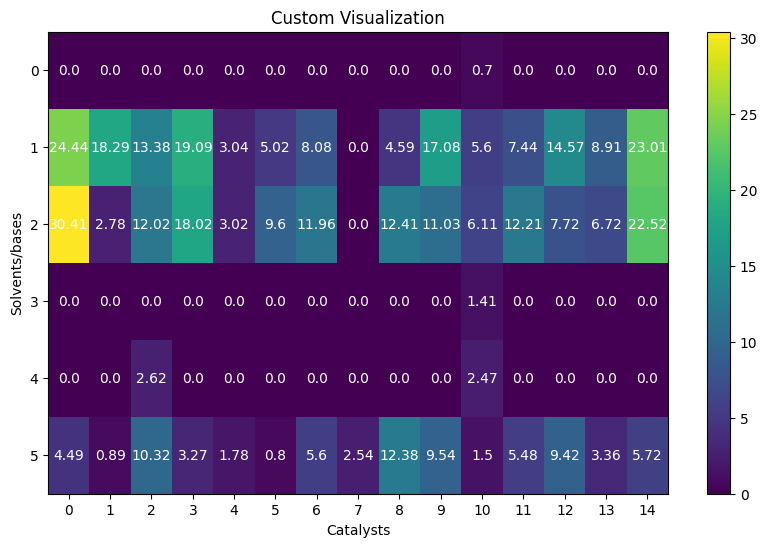

In [ ]:
visualize_plate_mixture(reshaped_plate_20)

In [ ]:
#select a tollerance of number of yields that can be differnet from zero across ligands for a given solvent/base condition and select all the conditions that have produced significan yuield across all experiments
toll_exp = 6
inidces_to_keep = []
for i in range(reshaped_plate_20.shape[0]):
  if np.sum(reshaped_plate_20[i,:] > 0) > toll_exp:
    inidces_to_keep.append(i)


In [ ]:
y_averaged_signal = np.mean(reshaped_plate_20[inidces_to_keep,:], axis=0)

In [ ]:
y_averaged_signal

array([19.78005019,  7.31685819, 11.90557048, 13.46017087,  2.6145974 ,
        5.13942124,  8.54718258,  0.84534524,  9.79076506, 12.54928214,
        4.40139132,  8.37365969, 10.57142169,  6.33116635, 17.08328302])

In [ ]:
M = np.array([[1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0],
              [0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0],
              [0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0],
              [0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0],
              [0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0],
              [1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1],
              [0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1],
              [0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0],
              [0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0],
              [0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1],
              [1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0],
              [0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0],
              [0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0],
              [0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0],
              [0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0]])

In [ ]:
def Compressed_Sensing_CVXPY(M, y, n_hit, true_negatives = set([]), epsilon = 0.1, verbose=False):

  ### L1 NORM ###
  n = M.shape[1]
  # The threshold value below which we consider an element to be zero.
  delta = 1e-8

  true_neg_indices = list(true_negatives)
  true_neg_indices.sort()

  x_l1 = cp.Variable(shape=n)

  # Setup the problem.
  obj = cp.Minimize( cp.norm(x_l1, 1) )
  if len(true_negatives) > 0:
    constraints = [cp.norm2(y - M @ x_l1) <= epsilon, x_l1[true_neg_indices] == 0]
  else:
    constraints = [cp.norm2(y - M @ x_l1) <= epsilon]
  prob = cp.Problem(obj, constraints)
  prob.solve()
  if verbose:
    print("Status: ", prob.status)
    print("Optimal value of optimization problem", obj.value)

  new_possible_hits = [i for i in range(len(x_l1.value)) if x_l1.value[i] >= 0.1]
  if verbose:
    print("Optimal solution", new_possible_hits)
  yield_of_hitters = x_l1.value[new_possible_hits]
  if verbose:
    print("Optimal yield", yield_of_hitters)

  if len(new_possible_hits) <= n_hit:
    return new_possible_hits

  #return the top n new possible hitters in terms of yield
  combined = list(zip(new_possible_hits, yield_of_hitters))
  sorted_combined = sorted(combined, key=lambda x: x[1], reverse=True)
  top_n_hitters = [x[0] for x in sorted_combined[:n_hit]]

  names = ['meCgPPh', 'TrixiePhos','IPENT Cl','RuPhos', 'RockPhos','VPhos', 'PPh_3',  'tBuBrettPhos', 'SIPr','CPhos',  'DPEPhos',  'AlPhos','Triisobutyl-Phosphatrane','SPhos', 'XantPhos','Me3(OMe)-tBuXPhos','Amphos','Jackie CPhos' ,  'dppp', 'Mordal-Phos', 'Jackie Phos', 'dppf','P(tBu)_3','GPhos',    'BINAP','BippyPhos','cataCXlum A', 'dppdtbpf','QPhos', 'cBridP', 'dtbpf','JosiPhosSL J009-1','PCy_3', 'XPhos','tBuXPhos' ]
  top_hitters_names = [names[i] for i in top_n_hitters]

  if verbose:
    print("Top", n_hit, "hitters", top_hitters_names)
    print("With yield", [x[1] for x in sorted_combined[:n_hit]] )


  return top_hitters_names, [x[1] for x in sorted_combined[:n_hit]]

In [ ]:
top_hitters_names, top_hitters_yields = Compressed_Sensing_CVXPY(M, y_averaged_signal, verbose = True, n_hit = 12)

Status:  optimal
Optimal value of optimization problem 46.10762237453533
Optimal solution [0, 1, 2, 4, 5, 6, 8, 9, 10, 12, 13, 14, 16, 17, 18, 19, 20, 22, 23, 24, 25, 27, 28, 29, 30, 32, 33, 34]
Optimal yield [0.70972048 1.19513899 0.19432268 0.94065822 0.64243302 1.08484688
 0.9429371  1.56385507 1.11318196 3.34620264 0.81826055 1.9336512
 0.17624601 3.0099568  2.09002187 2.1586281  0.40770959 1.92561617
 0.20214236 1.28343042 0.53824965 0.71111338 3.26528012 9.53193879
 0.60958486 0.18711264 3.72438782 1.66761399]
Top 12 hitters ['cBridP', 'XPhos', 'Triisobutyl-Phosphatrane', 'QPhos', 'Jackie CPhos', 'Mordal-Phos', 'dppp', 'XantPhos', 'P(tBu)_3', 'tBuXPhos', 'CPhos', 'BINAP']
With yield [9.531938790007572, 3.724387820566393, 3.346202644955746, 3.2652801188028584, 3.009956799019066, 2.1586281002460677, 2.090021874656145, 1.9336511951439417, 1.9256161727795613, 1.667613994667682, 1.5638550657776915, 1.2834304249584858]


In [ ]:
result_final = pd.DataFrame({'Hitters': top_hitters_names, 'Reconstructed Yield': top_hitters_yields})

In [ ]:
result_final

,Hitters,Reconstructed Yield
0,cBridP,9.531939
1,XPhos,3.724388
2,Triisobutyl-Phosphatrane,3.346203
3,QPhos,3.265280
4,Jackie CPhos,3.009957
5,Mordal-Phos,2.158628
6,dppp,2.090022
7,XantPhos,1.933651
8,P(tBu)_3,1.925616
9,tBuXPhos,1.667614


--------------------
## Putting the script all together (Ver 1.0)

In [ ]:
import pandas as pd
import numpy as np
import cvxpy as cp
import matplotlib.pyplot as plt

#data import
data_raw = pd.read_table('/content/drive/MyDrive/Data/Plate_20_1_7.csv', encoding='utf-16', sep=",")

#assuming that all the lines with N.A.s are non-inportant lines where the yield is zero
df_not_nans = data_raw.dropna()

#the column PlateRow has letters from A to H, transform it in numbers form 1 to 8 because needed for indexing
mapping = {'A': 1, 'B': 2, 'C': 3, 'D': 4, 'E': 5, 'F': 6, 'G': 7, 'H': 8}
df_not_nans['PlateRow'] = df_not_nans['PlateRow'].map(mapping)

#make all the entries of column SAMPLENUMBER of type int
df_not_nans['SAMPLENUMBER'] = df_not_nans['SAMPLENUMBER'].astype(int)

#Get the maximum number of timepoints present
max_time = np.max(df_not_nans['SAMPLENUMBER'].unique())

#initialize array for storing resutls
final_array = np.zeros((8, 12, max_time))

#fill the array with the data
for index, row in df_not_nans.iterrows():
  final_array[row['PlateRow']-1, row['PlateColumn']-1 ,row['SAMPLENUMBER']-1] = row['AREA_TOTAL_REDUCED']

#time correction: for each condition and each mixture combination, if there is another timepoint with a value different than zero, it uses that.
#This is due to the fact that sometimes we see some yield that at a following timestep disappears, which is not possible of course and is an error of the measuring robot we need to correct for.
for t in range(1,max_time):
  for i in range(final_array.shape[0]):
    for j in range(final_array.shape[1]):
      if final_array[i,j,t] == 0 and final_array[i,j,t-1] != 0:
        final_array[i,j,t] = final_array[i,j,t-1]

#now we can decide to to the max or the average of all timepoints, we decide to do the average
final_array = np.mean(final_array, axis=2)

#reshape the plate for easier manipulation
reshaped_plate_20 = np.concatenate((final_array[:,:6], final_array[:7,6:]), axis=0).T

#select a tollerance of number of yields that can be differnet from zero across ligands for a given solvent/base condition and select all the conditions that have produced significan yuield across all experiments
toll_exp = 6
inidces_to_keep = []
for i in range(reshaped_plate_20.shape[0]):
  if np.sum(reshaped_plate_20[i,:] > 0) > toll_exp:
    inidces_to_keep.append(i)

#use average of the signal from all conditions as it is the thing that seems to work the best for now
y_averaged_signal = np.mean(reshaped_plate_20[inidces_to_keep,:], axis=0)

#The triple Kirkman 15x35 pooling matrix
M = np.array([[1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0],
              [0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0],
              [0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0],
              [0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0],
              [0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0],
              [1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1],
              [0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1],
              [0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0],
              [0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0],
              [0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1],
              [1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0],
              [0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0],
              [0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0],
              [0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0],
              [0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0]])


def Compressed_Sensing_CVXPY(M, y, n_hit, true_negatives = set([]), epsilon = 0.1, verbose=False):
  """
  Function that performs compressed sensing using CVXPY.
  """

  ### L1 NORM ###
  n = M.shape[1]
  # The threshold value below which we consider an element to be zero.
  delta = 1e-8

  true_neg_indices = list(true_negatives)
  true_neg_indices.sort()

  x_l1 = cp.Variable(shape=n)

  # Setup the problem.
  obj = cp.Minimize( cp.norm(x_l1, 1) )
  if len(true_negatives) > 0:
    constraints = [cp.norm2(y - M @ x_l1) <= epsilon, x_l1[true_neg_indices] == 0]
  else:
    constraints = [cp.norm2(y - M @ x_l1) <= epsilon]
  prob = cp.Problem(obj, constraints)
  prob.solve()
  if verbose:
    print("Status: ", prob.status)
    print("Optimal value of optimization problem", obj.value)

  new_possible_hits = [i for i in range(len(x_l1.value)) if x_l1.value[i] >= 0.1]
  if verbose:
    print("Optimal solution", new_possible_hits)
  yield_of_hitters = x_l1.value[new_possible_hits]
  if verbose:
    print("Optimal yield", yield_of_hitters)

  if len(new_possible_hits) <= n_hit:
    return new_possible_hits

  #return the top n new possible hitters in terms of yield
  combined = list(zip(new_possible_hits, yield_of_hitters))
  sorted_combined = sorted(combined, key=lambda x: x[1], reverse=True)
  top_n_hitters = [x[0] for x in sorted_combined[:n_hit]]

  names = ['meCgPPh', 'TrixiePhos','IPENT Cl','RuPhos', 'RockPhos','VPhos', 'PPh_3',  'tBuBrettPhos', 'SIPr','CPhos',  'DPEPhos',  'AlPhos','Triisobutyl-Phosphatrane','SPhos', 'XantPhos','Me3(OMe)-tBuXPhos','Amphos','Jackie CPhos' ,  'dppp', 'Mordal-Phos', 'Jackie Phos', 'dppf','P(tBu)_3','GPhos',    'BINAP','BippyPhos','cataCXlum A', 'dppdtbpf','QPhos', 'cBridP', 'dtbpf','JosiPhosSL J009-1','PCy_3', 'XPhos','tBuXPhos' ]
  top_hitters_names = [names[i] for i in top_n_hitters]

  if verbose:
    print("Top", n_hit, "hitters", top_hitters_names)
    print("With yield", [x[1] for x in sorted_combined[:n_hit]] )


  return top_hitters_names, [x[1] for x in sorted_combined[:n_hit]]

top_hitters_names, top_hitters_yields = Compressed_Sensing_CVXPY(M, y_averaged_signal, verbose = False, n_hit = 12)

result_final = pd.DataFrame({'Hitters': top_hitters_names, 'Reconstructed Yield': [top_hitters_yields[i] * 7 for i in range(len(top_hitters_yields))]})

<ipython-input-58-78e21b7ae14f>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_not_nans['PlateRow'] = df_not_nans['PlateRow'].map(mapping)
<ipython-input-58-78e21b7ae14f>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_not_nans['SAMPLENUMBER'] = df_not_nans['SAMPLENUMBER'].astype(int)


------
## Ver 2.0

In [ ]:
import pandas as pd
import numpy as np
import cvxpy as cp
import matplotlib.pyplot as plt

#This should not appear in spotfire, values should
#be decided somehow form dropdown menu
###########################################
#### GLOBAL VARIABLES/HYPERPARAMETERS #####
################ AND INPUTS ###############
###########################################

#data import
data_raw = pd.read_table('/content/drive/MyDrive/Data/424_13_new_new_new.csv', encoding='utf-16', sep=",")
#Decides if we correct for disappearing area% in future timepoints
time_correction = True
#Decudes if we use the fraction of experiments with starting material inside as weights for mixing between timepoints. Not recomended when ther are SAMPLEPOINTS with a lot of overall area% and not a lot SM
SM_weights = True
#For a fixed solvent/base condition, decides minimnum number of mixed experiments that should have area% != 0 in order to consider the chemical condition for the average
toll_exp = 6
#Cats names needed to find again the matrix that was used for the pooling
cats_names = pd.read_table('/content/drive/MyDrive/Data/35_Catalysts - Sheet1.csv', sep=",")
#reconsturct all the yields of the catalysts in different conditions
reconstruct_all = True
#TODO: Chemical prior switch and input

###########################################
######## REFIND THE POOLING MATRIX ########
###########################################

#same as in the plate constructor data function
#First matrix given explicitely
M_15_35 = np.array([[1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0],
              [0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0],
              [0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0],
              [0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0],
              [0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0],
              [1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1],
              [0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1],
              [0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0],
              [0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0],
              [0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1],
              [1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0],
              [0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0],
              [0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0],
              [0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0],
              [0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0]])


# Given triplets from https://www.gutenberg.org/files/26839/26839-pdf.pdf (p.107), we create teh second full matrix on the fly (not computationally expensive at all)
triplets = [
    [1, 8, 15], [2, 9, 16], [3, 10, 17], [4, 11, 18], [5, 12, 19], [6, 13, 20], [7, 14, 21],  # First Day
    [1, 2, 6], [4, 5, 9], [7, 8, 12], [10, 11, 15], [13, 14, 18], [16, 17, 21], [19, 20, 3],  # Second Day
    [7, 10, 16], [8, 11, 17], [12, 15, 21], [18, 19, 2], [20, 1, 9], [3, 5, 13], [4, 6, 14],  # Third Day
    [13, 16, 1], [14, 17, 2], [18, 21, 6], [3, 4, 8], [5, 7, 15], [9, 11, 19], [10, 12, 20],  # Fourth Day
    [4, 7, 13], [5, 8, 14], [9, 12, 18], [15, 16, 20], [17, 19, 6], [21, 2, 10], [1, 3, 11],  # Fifth Day
    [1, 4, 10], [2, 5, 11], [6, 9, 15], [12, 13, 17], [14, 16, 3], [18, 20, 7], [19, 21, 8],  # Sixth Day
    [2, 3, 7], [5, 6, 10], [8, 9, 13], [11, 12, 16], [14, 15, 19], [17, 18, 1], [20, 21, 4],  # Seventh Day
    [10, 13, 19], [11, 14, 20], [15, 18, 3], [21, 1, 5], [2, 4, 12], [6, 8, 16], [7, 9, 17],  # Eighth Day
    [16, 19, 4], [17, 20, 5], [21, 3, 9], [6, 7, 11], [8, 10, 15], [12, 14, 18], [13, 15, 2],  # Ninth Day
    [19, 1, 7], [20, 2, 8], [3, 6, 12], [9, 10, 14], [11, 13, 21], [15, 17, 4], [16, 18, 5]   # Tenth Day
]

# Initialize an array of 0s, with 21 rows (one for each number) and 70 columns (one for each triplet)
M_21_70 = np.zeros((21, 70), dtype=int)

# Fill the M_21_70 with 1s according to the triplets
for col_idx, triplet in enumerate(triplets):
    for number in triplet:
        M_21_70[number-1, col_idx] = 1  # -1 to adjust for 0-based indexing

#read the table from .csv file (which will be in Spotfire)
cats_names = list(cats_names['CATALYST'])

if len(cats_names) <= 24:
  raise ValueError("For a small cats library (<= 24) better to use single experiments!")

if len(cats_names) == 35 or (len(cats_names)%5 == 0 and len(cats_names) <= 35):
  matrix_to_use = M_15_35[:,:len(cats_names)]
  extra_carbine_name = 'IPENT Cl'
elif len(cats_names)%7 ==0 and len(cats_names) <= 70:
  matrix_to_use = M_21_70[:,:len(cats_names)]
  extra_carbine_name = ["IPENT Cl", "DiMel-HeptCl", "SIPr"]
else:
  raise ValueError(f"Number of catalysts should be a multipe of 5 or 7 for Kirkman matrix, instead the list of given catalysts is of dimension {len(cats_names)}! Please rerun the plate building script and make sure there the design of the plate was done correctly")

overall_result = []
for i in range(matrix_to_use.shape[0]):
  overall_result.append([cats_names[j] for j in range(matrix_to_use.shape[1]) if matrix_to_use[i,j] != 0])

# Make the list of list of strings "overall_result" a list of strings by putting all the elements of the inner lists inside a single string
overall_result_strings = []
for inner_list in overall_result:
  overall_result_strings.append(", ".join(inner_list))

###########################################
############## PREPROCESSING ##############
###########################################

#assuming that all the lines with N.A.s are non-inportant lines where the yield is zero
df_not_nans = data_raw.dropna()

#Create a dataframe that stores the informtion about the SMs
SM_dataframe = df_not_nans[(df_not_nans["COMPOUND"] == "lim SM")]

#make all the entries of column SAMPLENUMBER of type int
df_not_nans['SAMPLENUMBER'] = df_not_nans['SAMPLENUMBER'].astype(int)

#Get the maximum number of timepoints present
max_time = np.max(df_not_nans['SAMPLENUMBER'].unique())
print("Max Time is:", max_time)

#For each timepoint calculate the fraction of vials with some starting material inside
perc_of_vials_with_sm = []
for time in range(1, max_time+1):
  perc_of_vials_with_sm.append(SM_dataframe[SM_dataframe["SAMPLENUMBER"] == time].shape[0] / 96 * 100)

df_perc_of_sm = pd.DataFrame(np.array(perc_of_vials_with_sm).reshape(1, -1),
                             index=["Percentage"],
                             columns=[f"Timepoint {i}" for i in range(1, max_time + 1)])
#add to the df another column with the average value
df_perc_of_sm["Average"] = df_perc_of_sm.mean(axis=1)

#Transform them into time weights
time_weights = np.array(perc_of_vials_with_sm) / np.sum(perc_of_vials_with_sm)
if SM_weights:
  print("Time weights are:", time_weights)

#Create df with other unknown things
df_other_stuff = df_not_nans[(df_not_nans["COMPOUND"] != "lim SM") & (df_not_nans["COMPOUND"] != "Product") & (df_not_nans["COMPOUND"] != "other SM")]

#get avg min max for each timepoints
otherstuff_data = []
for time in range(1, max_time+1):
  other_t = df_other_stuff[df_other_stuff["SAMPLENUMBER"] == time]
  otherstuff_data.append([other_t["AREA_TOTAL_REDUCED"].mean(), other_t["AREA_TOTAL_REDUCED"].min(), other_t["AREA_TOTAL_REDUCED"].max()])

#make a dataframe with the data
other_df = pd.DataFrame(np.array(otherstuff_data),
                             index=[f"Timepoint {i}" for i in range(1, max_time + 1)],
                             columns=["AVG area%", "MIN area%", "MAX area%"])

#Isolate dataframe with just product
product_df = df_not_nans[df_not_nans["COMPOUND"] == "Product"]

#Extract names of the solvelt/base
chem = df_not_nans["ColumnLabel"]
#remove the first three characters of every string
chem_num = [int(s.split(':')[0])-1 for s in chem]
chem_names = [chem[i][3:-1] for i in range(len(chem))]
#unite the two lists in a dictionary with key chem num and with value chem names
chem_dict = dict(zip(chem_num, chem_names))

#the column PlateRow has letters from A to H, transform it in numbers form 1 to 8 because needed for indexing
mapping = {'A': 1, 'B': 2, 'C': 3, 'D': 4, 'E': 5, 'F': 6, 'G': 7, 'H': 8}
product_df['PLATEROW'] = product_df['PLATEROW'].map(mapping)


#initialize array for storing resutls
final_array = np.zeros((8, 12, max_time))

#fill the array with the data
for index, row in product_df.iterrows():
  final_array[row['PLATEROW']-1, row['PLATECOLUMN']-1 ,row['SAMPLENUMBER']-1] = row['AREA_TOTAL_REDUCED']

#time correction: for each condition and each mixture combination, if there is another timepoint with a value different than zero, it uses that.
#This is due to the fact that sometimes we see some yield that at a following timestep disappears, which is not possible of course and is an error of the measuring robot we need to correct for.
if time_correction:
  for t in range(1,max_time):
    for i in range(final_array.shape[0]):
      for j in range(final_array.shape[1]):
        if final_array[i,j,t] == 0 and final_array[i,j,t-1] != 0:
          final_array[i,j,t] = final_array[i,j,t-1]

#now we can decide to to the max or the average of all timepoints, we decide to do the average with or without SM weights
if SM_weights:
  final_array = np.average(final_array, axis=2, weights=time_weights)
else:
  final_array = np.mean(final_array, axis=2)

#If there is at least one condition in which the carbine has more than 50% yield, then we should consider this class of Pd-ligands for the follow up screaning
if matrix_to_use.shape[0] == 15:
  if np.max(final_array[7,6:]) >= 50:
    print("Should consider carbine in the analysis")
  else:
    print("Can discard Carbines for follow-up plate ")
elif matrix_to_use.shape[0] == 21:
  #TO CHECK IF DESIGN OF BIG PLATE IS HOW GEORG WANTS
  if np.max(final_array[4:,9]) >= 50:
    print("Should consider IPENT Cl in the analysis")
  elif np.max(final_array[4:,10]) >= 50:
    print("Should consider DiMel-HeptCl in the analysis")
  elif np.max(final_array[4:,11]) >= 50:
    print("Should consider SIPr in the analysis")
  else:
    print("Can discard Carbines for follow-up plate ")
else:
  print("Please check the deduced pooling matrix as there might be a bug")
#reshape the plate for easier manipulation
reshaped_plate = np.concatenate((final_array[:,:6], final_array[:7,6:]), axis=0).T

#create a df for the reashaped plate
df_reshaped_plate = pd.DataFrame(reshaped_plate)
df_reshaped_plate.columns = [overall_result_strings[i] for i in range(reshaped_plate.shape[1])]
df_reshaped_plate.index = [chem_dict[i] for i in range(reshaped_plate.shape[0])]

# print("The reshaped plate is:")
# visualize_plate_mixture(reshaped_plate, title = "Plate")

#select a tollerance of number of yields that can be differnet from zero across ligands for a given solvent/base condition and select all the conditions that have produced significant yield across all experiments
indices_to_keep = []
for i in range(reshaped_plate.shape[0]):
  if np.sum(reshaped_plate[i,:] > 0) > toll_exp:
    indices_to_keep.append(i)

print("The selected conditions are:", indices_to_keep)

#Select the two condidtions (rows) with higher overall yield
top_two_indices = np.argsort(np.sum(reshaped_plate, axis = 1))[-2:][::-1]
#Print top two conditions from chem_dict
print("The best two conditions are", [chem_dict[i] for i in top_two_indices])

#gat array with area% sum for each condition
sum_array = np.sum(reshaped_plate, axis = 1)
avg_array = np.mean(reshaped_plate, axis = 1)
min_array = np.min(reshaped_plate, axis = 1)
max_array = np.max(reshaped_plate, axis = 1)
#sorted arguments
sorted_args = np.argsort(sum_array)
#create dataframe
chem_cond_df = pd.DataFrame([[chem_dict[i] for i in sorted_args], np.sort(avg_array), np.sort(min_array), np.sort(max_array)]).T
#give title to column
chem_cond_df.columns = ['Chemical Condition', 'AVG area%', 'MIN area%', 'MAX area%']
#invert the order of the rows
chem_cond_df = chem_cond_df.iloc[::-1]


#use average of the signal from all conditions as it is the thing that seems to work the best for now
y_averaged_signal = np.mean(reshaped_plate[indices_to_keep,:], axis=0)

#The triple Kirkman 15x35 pooling matrix
M = matrix_to_use

def Compressed_Sensing_CVXPY(M, y, n_hit, true_negatives = set([]), epsilon = 0.1, verbose=False):
  """
  Function that performs compressed sensing using CVXPY.
  """

  ### L1 NORM ###
  n = M.shape[1]
  # The threshold value below which we consider an element to be zero.
  delta = 1e-8

  true_neg_indices = list(true_negatives)
  true_neg_indices.sort()

  x_l1 = cp.Variable(shape=n)

  # Setup the problem.
  obj = cp.Minimize( cp.norm(x_l1, 1) )
  if len(true_negatives) > 0:
    constraints = [cp.norm2(y - M @ x_l1) <= epsilon, x_l1[true_neg_indices] == 0]
  else:
    constraints = [cp.norm2(y - M @ x_l1) <= epsilon]
  prob = cp.Problem(obj, constraints)
  prob.solve()
  if verbose:
    print("Status: ", prob.status)
    print("Optimal value of optimization problem", obj.value)

  new_possible_hits = [i for i in range(len(x_l1.value)) if x_l1.value[i] >= 0.1]
  if verbose:
    print("Optimal solution", new_possible_hits)
  yield_of_hitters = x_l1.value[new_possible_hits]
  if verbose:
    print("Optimal yield", yield_of_hitters)

  if len(new_possible_hits) <= n_hit:
    return new_possible_hits, yield_of_hitters

  #return the top n new possible hitters in terms of yield
  combined = list(zip(new_possible_hits, yield_of_hitters))
  sorted_combined = sorted(combined, key=lambda x: x[1], reverse=True)
  top_n_hitters = [x[0] for x in sorted_combined[:n_hit]]

  names = cats_names
  top_hitters_names = [names[i] for i in top_n_hitters]

  if verbose:
    print("Top", n_hit, "hitters", top_hitters_names)
    print("With yield", [x[1] for x in sorted_combined[:n_hit]] )


  return top_hitters_names, [x[1] for x in sorted_combined[:n_hit]]


##TO DO: Integration of the chemical prior

top_hitters_names, top_hitters_yields = Compressed_Sensing_CVXPY(M, y_averaged_signal, verbose = False, n_hit = 12)

if matrix_to_use.shape[0] == 15:
  pool_size = matrix_to_use.shape[1] // 5
if matrix_to_use.shape[0] == 21:
  pool_size = matrix_to_use.shape[1] // 7

result_final = pd.DataFrame({'Hitters': top_hitters_names, 'Reconstructed Yield': [top_hitters_yields[i] * pool_size for i in range(len(top_hitters_yields))]})

if reconstruct_all:
  complete_data = []
  for cond in range(reshaped_plate.shape[0]):
    a, b = Compressed_Sensing_CVXPY(M, reshaped_plate[cond], verbose = False, n_hit = M.shape[1])
    new_vec = np.zeros(M.shape[1])
    for i in range(len(a)):
      new_vec[a[i]] = b[i]
    complete_data.append(new_vec)
  complete_data = np.array(complete_data)
  #normalization to [0,100]
  complete_data = complete_data / np.max(complete_data) * 100

  #creare a dataframe form complete_data
  df_complete_data = pd.DataFrame(complete_data)
  df_complete_data.columns = cats_names
  df_complete_data.index = [chem_dict[i] for i in range(complete_data.shape[0])]


Max Time is: 2
Time weights are: [0.50857143 0.49142857]
Can discard Carbines for follow-up plate 
The selected conditions are: [0, 1, 2, 3, 4, 5]
The best two conditions are ['K2CO3 (3.0 eq)/ MeTHF (10vol)', 'K2CO3 (3.0 eq)/ THF (10vol)']


<ipython-input-59-754bdcc1cf35>:156: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  product_df['PLATEROW'] = product_df['PLATEROW'].map(mapping)


In [ ]:
chem_cond_df

,Chemical Condition,AVG area%,MIN area%,MAX area%
5,K2CO3 (3.0 eq)/ MeTHF (10vol),46.085032,5.642513,80.542309
4,K2CO3 (3.0 eq)/ THF (10vol),44.989266,4.502837,79.348858
3,Cs2CO3 (3.0 eq)/ anisole (10vol),41.533718,4.18775,78.989878
2,K3PO4 (3.0 eq)/ THF (10vol),41.289433,2.082964,76.972647
1,NEt3 (3.0 eq)/ anisole (10vol),35.915896,1.194204,69.879973
0,NEt3 (3.0 eq)/ DMI (10vol),24.505738,0.417717,63.33824


In [ ]:
result_final

,Hitters,Reconstructed Yield
0,AlPhos,244.576456
1,tBuXPhos,181.722628
2,tBuBrettPhos,148.365124
3,P(tBu)_3,142.177069
4,dppf,139.263754
5,RockPhos,106.533630
6,GPhos,70.802114
7,cBridP,58.897608
8,Me3(OMe)-tBuXPhos,36.727911
9,Triisobutyl-Phosphatrane,22.248439


In [ ]:
df_perc_of_sm

,Timepoint 1,Timepoint 2,Average
Percentage,92.708333,89.583333,91.145833


In [ ]:
other_df

,AVG area%,MIN area%,MAX area%
Timepoint 1,0.995707,0.110606,5.268022
Timepoint 2,2.719696,0.054715,34.833496


In [ ]:
df_reshaped_plate

,"meCgPPh, VPhos, XantPhos, Jackie CPhos, GPhos, cBridP, XPhos","TrixiePhos, VPhos, DPEPhos, Mordal-Phos, BINAP, dppdtbpf, PCy_3","P(oTol)_3, PPh_3, DPEPhos, dppp, Jackie Phos, QPhos, XPhos","RuPhos, PPh_3, AlPhos, Mordal-Phos, dppf, cBridP, dtbpf","RockPhos, VPhos, AlPhos, Me3(OMe)-tBuXPhos, Jackie Phos, BippyPhos, JosiPhosSL J009-1","meCgPPh, CPhos, DPEPhos, Me3(OMe)-tBuXPhos, dppf, cataCXlum A, tBuXPhos","TrixiePhos, PPh_3, XantPhos, Amphos, P(tBu)_3, BippyPhos, tBuXPhos","P(oTol)_3, tBuBrettPhos, AlPhos, Amphos, GPhos, cataCXlum A, PCy_3","RuPhos, tBuBrettPhos, Triisobutyl-Phosphatrane, Me3(OMe)-tBuXPhos, P(tBu)_3, dppdtbpf, XPhos","RockPhos, CyJohnPhos, Triisobutyl-Phosphatrane, Mordal-Phos, GPhos, QPhos, tBuXPhos","meCgPPh, CyJohnPhos, SPhos, Amphos, Jackie Phos, dppdtbpf, dtbpf","TrixiePhos, tBuBrettPhos, SPhos, Jackie CPhos, dppf, QPhos, JosiPhosSL J009-1","P(oTol)_3, CPhos, Triisobutyl-Phosphatrane, Jackie CPhos, BINAP, BippyPhos, dtbpf","RuPhos, CyJohnPhos, XantPhos, dppp, BINAP, cataCXlum A, JosiPhosSL J009-1","RockPhos, CPhos, SPhos, dppp, P(tBu)_3, cBridP, PCy_3"
NEt3 (3.0 eq)/ DMI (10vol),2.726849,0.417717,0.464474,63.338240,58.500030,26.449571,15.333900,58.931237,33.865710,42.318709,2.165955,26.908602,2.212913,0.942297,33.009869
K3PO4 (3.0 eq)/ THF (10vol),21.835779,5.052992,3.384484,71.927615,66.778188,57.560237,63.826137,76.972647,53.503259,65.373837,8.792523,55.892645,14.321829,2.082964,52.036353
K2CO3 (3.0 eq)/ THF (10vol),34.607320,9.443815,4.811163,70.348165,61.957764,66.913297,66.940174,78.989878,65.207894,72.773893,5.501065,55.137866,19.456709,4.502837,58.247152
Cs2CO3 (3.0 eq)/ anisole (10vol),30.987618,31.765994,13.713835,69.879973,45.314068,55.321544,68.341324,55.779008,42.973794,56.917726,18.709197,52.147195,19.367500,4.187750,57.599246
NEt3 (3.0 eq)/ anisole (10vol),17.027675,2.067804,2.218929,71.051960,60.656580,61.129625,37.247350,80.542309,48.283096,59.708904,2.661130,39.683211,4.509682,1.194204,50.755987
K2CO3 (3.0 eq)/ MeTHF (10vol),40.045552,8.479415,6.794614,62.335303,68.454445,72.425315,76.386131,79.348858,68.929257,51.648998,10.516497,61.960677,21.202494,5.642513,57.105415


In [ ]:
df_complete_data

,meCgPPh,TrixiePhos,P(oTol)_3,RuPhos,RockPhos,VPhos,PPh_3,tBuBrettPhos,CyJohnPhos,CPhos,...,BippyPhos,cataCXlum A,dppdtbpf,QPhos,cBridP,dtbpf,JosiPhosSL J009-1,PCy_3,XPhos,tBuXPhos
NEt3 (3.0 eq)/ DMI (10vol),0.863693,0.000000,0.000000,9.810090,52.966751,0.000000,0.000000,38.366313,1.076463,2.330723,...,0.000000,2.032794,0.878070,0.000000,6.240808,0.808298,0.000000,1.886901,0.000000,23.314251
K3PO4 (3.0 eq)/ THF (10vol),2.445299,4.207794,0.921071,0.799609,49.711093,1.775040,2.088648,64.330997,0.857782,1.964525,...,12.882632,0.517758,1.438325,2.061920,17.868504,3.408289,0.917217,1.125244,1.382524,79.996463
K2CO3 (3.0 eq)/ THF (10vol),2.175631,5.653131,1.972617,2.099585,38.576760,3.418788,2.587928,65.338431,1.022249,9.710854,...,11.338123,1.890160,1.558350,2.316307,28.962718,2.412374,1.913791,4.934992,2.053604,83.156981
Cs2CO3 (3.0 eq)/ anisole (10vol),5.368178,25.404042,4.489414,1.712703,26.962758,7.055496,11.068327,28.631952,1.417789,9.062432,...,11.691350,1.582899,5.053391,6.673681,31.543907,6.146273,1.571065,16.847640,4.374491,58.784981
NEt3 (3.0 eq)/ anisole (10vol),1.159821,0.000000,0.851374,4.245101,46.328459,0.000000,0.872458,56.032670,0.980380,13.958799,...,0.000000,8.811913,0.946341,0.832031,19.965848,0.965900,0.000000,10.258554,0.880105,63.171629
K2CO3 (3.0 eq)/ MeTHF (10vol),7.095994,8.678050,2.453326,0.000000,22.668728,6.318430,3.573602,67.920270,0.000000,10.765570,...,26.150213,4.148257,0.000000,2.943374,29.630710,0.000000,4.385536,5.728043,2.845530,71.732248


----------

## VER 2.0 with chemical prior

In [ ]:
!pip freeze | grep numpy

numpy==1.26.4


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Data/embedding_df_our_table.csv", sep=',')
#set first column as index
# df.set_index(df.columns[0], inplace=True)
df.head()

,Unnamed: 0,x,y
0,meCgPPh,520,88
1,RuPhos,628,90
2,VPhos,753,90
3,IPENT Cl,1305,117
4,DiMel-HeptCl,1423,127


In [ ]:
import pandas as pd
import numpy as np
import cvxpy as cp

from scipy.spatial.distance import cdist
from scipy.spatial.distance import cdist
import itertools

#This should not appear in spotfire, values should
#be decided somehow form dropdown menu
###########################################
#### GLOBAL VARIABLES/HYPERPARAMETERS #####
################ AND INPUTS ###############
###########################################

#data import
data_raw = pd.read_table('/content/drive/MyDrive/Data/424_13_new_new_new.csv', encoding='utf-16', sep=",")
#Decides if we correct for disappearing area% in future timepoints
time_correction = True
#Decudes if we use the fraction of experiments with starting material inside as weights for mixing between timepoints. Not recomended when ther are SAMPLEPOINTS with a lot of overall area% and not a lot SM
SM_weights = True
#For a fixed solvent/base condition, decides minimnum number of mixed experiments that should have area% != 0 in order to consider the chemical condition for the average
toll_exp = 6
#Cats names needed to find again the matrix that was used for the pooling
cats_names = pd.read_table('/content/drive/MyDrive/Data/35_Catalysts - Sheet1.csv', sep=",")
#read the table from .csv file (which will be in Spotfire)
cats_names = list(cats_names['CATALYST'])
#reconsturct all the yields of the catalysts in different conditions
reconstruct_all = True
#Chemical prior switch
chemical_prior = True
#sigma parameter for similarity (SHOULD BE TUNED for each embedding)
sigma = 200
#lambda parameter for the weight of the prior in the optimizatio problem (SHOULD BE TUNED)
lambdaa = 1
#Chemical prior inpit (corrected for typos and missing bits). Pandas dataframe of dimension num_cats x embedding_dim with row index given by cats names (SPELLING SHOULD MATCH THE ONES IN cats_names ) this embedding should contain a vector for ALL the cats in cats_names
embedding_df = pd.read_csv("/content/drive/MyDrive/Data/embedding_df_our_table.csv", index_col=0)

###########################################
###### CHEM PRIOR MATRIX D CONSTRUCT ######
###########################################


if chemical_prior:
  #check that all the cats in cats_names are in the embedding dataframe
  if not set(cats_names).issubset(set(embedding_df.index)):
    missing_elements = []
    for name in cats_names:
      if name not in embedding_df.index:
        missing_elements.append(name)
    raise ValueError(f"Some elements in your catalyst list don't have a corresponding embedding!, please check the follwing cats in your embedding list: {missing_elements}")

  #subsetting just the catalyst we are interested in
  small_df = embedding_df.loc[cats_names]

  print(small_df.head())
  print(small_df.shape)
  print(small_df.dtypes)
  #create distance matrix
  dist_mat_2 = cdist(small_df, small_df)
  dist_mat_2 = pd.DataFrame(dist_mat_2, index=small_df.index, columns=small_df.index)

  #transform distance into similarities
  sim_mat = np.exp(-dist_mat_2**2 / (2 * sigma**2)) * 100

  #number of elements
  n = len(cats_names)

  # Calculate the number of unique pairs
  pairs = list(itertools.combinations(range(n), 2))
  m = len(pairs)

  # Initialize the matrix
  D = np.zeros((m, n), dtype=int)

  # Fill the matrix D
  for row_index, (i, k) in enumerate(pairs):
      D[row_index, i] = -1 * sim_mat.loc[cats_names[i], cats_names[k]] / 2
      D[row_index, k] = sim_mat.loc[cats_names[i], cats_names[k]] / 2


###########################################
######## REFIND THE POOLING MATRIX ########
###########################################

#same as in the plate constructor data function
#First matrix given explicitely
M_15_35 = np.array([[1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0],
              [0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0],
              [0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0],
              [0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0],
              [0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0],
              [1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1],
              [0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1],
              [0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0],
              [0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0],
              [0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1],
              [1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0],
              [0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0],
              [0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0],
              [0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0],
              [0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0]])


# Given triplets from https://www.gutenberg.org/files/26839/26839-pdf.pdf (p.107), we create teh second full matrix on the fly (not computationally expensive at all)
triplets = [
    [1, 8, 15], [2, 9, 16], [3, 10, 17], [4, 11, 18], [5, 12, 19], [6, 13, 20], [7, 14, 21],  # First Day
    [1, 2, 6], [4, 5, 9], [7, 8, 12], [10, 11, 15], [13, 14, 18], [16, 17, 21], [19, 20, 3],  # Second Day
    [7, 10, 16], [8, 11, 17], [12, 15, 21], [18, 19, 2], [20, 1, 9], [3, 5, 13], [4, 6, 14],  # Third Day
    [13, 16, 1], [14, 17, 2], [18, 21, 6], [3, 4, 8], [5, 7, 15], [9, 11, 19], [10, 12, 20],  # Fourth Day
    [4, 7, 13], [5, 8, 14], [9, 12, 18], [15, 16, 20], [17, 19, 6], [21, 2, 10], [1, 3, 11],  # Fifth Day
    [1, 4, 10], [2, 5, 11], [6, 9, 15], [12, 13, 17], [14, 16, 3], [18, 20, 7], [19, 21, 8],  # Sixth Day
    [2, 3, 7], [5, 6, 10], [8, 9, 13], [11, 12, 16], [14, 15, 19], [17, 18, 1], [20, 21, 4],  # Seventh Day
    [10, 13, 19], [11, 14, 20], [15, 18, 3], [21, 1, 5], [2, 4, 12], [6, 8, 16], [7, 9, 17],  # Eighth Day
    [16, 19, 4], [17, 20, 5], [21, 3, 9], [6, 7, 11], [8, 10, 15], [12, 14, 18], [13, 15, 2],  # Ninth Day
    [19, 1, 7], [20, 2, 8], [3, 6, 12], [9, 10, 14], [11, 13, 21], [15, 17, 4], [16, 18, 5]   # Tenth Day
]

# Initialize an array of 0s, with 21 rows (one for each number) and 70 columns (one for each triplet)
M_21_70 = np.zeros((21, 70), dtype=int)

# Fill the M_21_70 with 1s according to the triplets
for col_idx, triplet in enumerate(triplets):
    for number in triplet:
        M_21_70[number-1, col_idx] = 1  # -1 to adjust for 0-based indexing


if len(cats_names) <= 24:
  raise ValueError("For a small cats library (<= 24) better to use single experiments!")

if len(cats_names) == 35 or (len(cats_names)%5 == 0 and len(cats_names) <= 35):
  matrix_to_use = M_15_35[:,:len(cats_names)]
  extra_carbine_name = 'IPENT Cl'
elif len(cats_names)%7 ==0 and len(cats_names) <= 70:
  matrix_to_use = M_21_70[:,:len(cats_names)]
  extra_carbine_name = ["IPENT Cl", "DiMel-HeptCl", "SIPr"]
else:
  raise ValueError(f"Number of catalysts should be a multipe of 5 or 7 for Kirkman matrix, instead the list of given catalysts is of dimension {len(cats_names)}! Please rerun the plate building script and make sure there the design of the plate was done correctly")

overall_result = []
for i in range(matrix_to_use.shape[0]):
  overall_result.append([cats_names[j] for j in range(matrix_to_use.shape[1]) if matrix_to_use[i,j] != 0])

# Make the list of list of strings "overall_result" a list of strings by putting all the elements of the inner lists inside a single string
overall_result_strings = []
for inner_list in overall_result:
  overall_result_strings.append(", ".join(inner_list))

###########################################
############## PREPROCESSING ##############
###########################################

#assuming that all the lines with N.A.s are non-inportant lines where the yield is zero
df_not_nans = data_raw.dropna()

#Create a dataframe that stores the informtion about the SMs
SM_dataframe = df_not_nans[(df_not_nans["COMPOUND"] == "lim SM")]

#make all the entries of column SAMPLENUMBER of type int
df_not_nans['SAMPLENUMBER'] = df_not_nans['SAMPLENUMBER'].astype(int)

#Get the maximum number of timepoints present
max_time = np.max(df_not_nans['SAMPLENUMBER'].unique())
print("Max Time is:", max_time)

#For each timepoint calculate the fraction of vials with some starting material inside
perc_of_vials_with_sm = []
for time in range(1, max_time+1):
  perc_of_vials_with_sm.append(SM_dataframe[SM_dataframe["SAMPLENUMBER"] == time].shape[0] / 96 * 100)

df_perc_of_sm = pd.DataFrame(np.array(perc_of_vials_with_sm).reshape(1, -1),
                             index=["Percentage"],
                             columns=[f"Timepoint {i}" for i in range(1, max_time + 1)])
#add to the df another column with the average value
df_perc_of_sm["Average"] = df_perc_of_sm.mean(axis=1)

#Transform them into time weights
time_weights = np.array(perc_of_vials_with_sm) / np.sum(perc_of_vials_with_sm)
if SM_weights:
  print("Time weights are:", time_weights)

#Create df with other unknown things
df_other_stuff = df_not_nans[(df_not_nans["COMPOUND"] != "lim SM") & (df_not_nans["COMPOUND"] != "Product") & (df_not_nans["COMPOUND"] != "other SM")]

#get avg min max for each timepoints
otherstuff_data = []
for time in range(1, max_time+1):
  other_t = df_other_stuff[df_other_stuff["SAMPLENUMBER"] == time]
  otherstuff_data.append([other_t["AREA_TOTAL_REDUCED"].mean(), other_t["AREA_TOTAL_REDUCED"].min(), other_t["AREA_TOTAL_REDUCED"].max()])

#make a dataframe with the data
other_df = pd.DataFrame(np.array(otherstuff_data),
                             index=[f"Timepoint {i}" for i in range(1, max_time + 1)],
                             columns=["AVG area%", "MIN area%", "MAX area%"])

#Isolate dataframe with just product
product_df = df_not_nans[df_not_nans["COMPOUND"] == "Product"]

#Extract names of the solvelt/base
chem = df_not_nans["ColumnLabel"]
#remove the first three characters of every string
chem_num = [int(s.split(':')[0])-1 for s in chem]
chem_names = [chem[i][3:-1] for i in range(len(chem))]
#unite the two lists in a dictionary with key chem num and with value chem names
chem_dict = dict(zip(chem_num, chem_names))

#the column PlateRow has letters from A to H, transform it in numbers form 1 to 8 because needed for indexing
mapping = {'A': 1, 'B': 2, 'C': 3, 'D': 4, 'E': 5, 'F': 6, 'G': 7, 'H': 8}
product_df['PLATEROW'] = product_df['PLATEROW'].map(mapping)


#initialize array for storing resutls
final_array = np.zeros((8, 12, max_time))

#fill the array with the data
for index, row in product_df.iterrows():
  final_array[row['PLATEROW']-1, row['PLATECOLUMN']-1 ,row['SAMPLENUMBER']-1] = row['AREA_TOTAL_REDUCED']

#time correction: for each condition and each mixture combination, if there is another timepoint with a value different than zero, it uses that.
#This is due to the fact that sometimes we see some yield that at a following timestep disappears, which is not possible of course and is an error of the measuring robot we need to correct for.
if time_correction:
  for t in range(1,max_time):
    for i in range(final_array.shape[0]):
      for j in range(final_array.shape[1]):
        if final_array[i,j,t] == 0 and final_array[i,j,t-1] != 0:
          final_array[i,j,t] = final_array[i,j,t-1]

#now we can decide to to the max or the average of all timepoints, we decide to do the average with or without SM weights
if SM_weights:
  final_array = np.average(final_array, axis=2, weights=time_weights)
else:
  final_array = np.mean(final_array, axis=2)

#If there is at least one condition in which the carbine has more than 50% yield, then we should consider this class of Pd-ligands for the follow up screaning
if matrix_to_use.shape[0] == 15:
  if np.max(final_array[7,6:]) >= 50:
    print("Should consider carbine in the analysis")
  else:
    print("Can discard Carbines for follow-up plate ")
elif matrix_to_use.shape[0] == 21:
  #TO CHECK IF DESIGN OF BIG PLATE IS HOW GEORG WANTS
  if np.max(final_array[5,2::3]) >= 50:
    print("Should consider IPENT Cl in the analysis")
  elif np.max(final_array[6,2::3]) >= 50:
    print("Should consider DiMel-HeptCl in the analysis")
  elif np.max(final_array[7,2::3]) >= 50:
    print("Should consider SIPr in the analysis")
  else:
    print("Can discard Carbines for follow-up plate ")
else:
  print("Please check the deduced pooling matrix as there might be a bug")
#reshape the plate for easier manipulation
reshaped_plate = np.concatenate((final_array[:,:6], final_array[:7,6:]), axis=0).T

#create a df for the reashaped plate
df_reshaped_plate = pd.DataFrame(reshaped_plate)
df_reshaped_plate.columns = [overall_result_strings[i] for i in range(reshaped_plate.shape[1])]
df_reshaped_plate.index = [chem_dict[i] for i in range(reshaped_plate.shape[0])]

# print("The reshaped plate is:")
# visualize_plate_mixture(reshaped_plate, title = "Plate")

#select a tollerance of number of yields that can be differnet from zero across ligands for a given solvent/base condition and select all the conditions that have produced significant yield across all experiments
indices_to_keep = []
for i in range(reshaped_plate.shape[0]):
  if np.sum(reshaped_plate[i,:] > 0) > toll_exp:
    indices_to_keep.append(i)

print("The selected conditions are:", indices_to_keep)

#Select the two condidtions (rows) with higher overall yield
top_two_indices = np.argsort(np.sum(reshaped_plate, axis = 1))[-2:][::-1]
#Print top two conditions from chem_dict
print("The best two conditions are", [chem_dict[i] for i in top_two_indices])

#gat array with area% sum for each condition
sum_array = np.sum(reshaped_plate, axis = 1)
avg_array = np.mean(reshaped_plate, axis = 1)
min_array = np.min(reshaped_plate, axis = 1)
max_array = np.max(reshaped_plate, axis = 1)
#sorted arguments
sorted_args = np.argsort(sum_array)
#create dataframe
chem_cond_df = pd.DataFrame([[chem_dict[i] for i in sorted_args], np.sort(avg_array), np.sort(min_array), np.sort(max_array)]).T
#give title to column
chem_cond_df.columns = ['Chemical Condition', 'AVG area%', 'MIN area%', 'MAX area%']
#invert the order of the rows
chem_cond_df = chem_cond_df.iloc[::-1]


#use average of the signal from all conditions as it is the thing that seems to work the best for now
y_averaged_signal = np.mean(reshaped_plate[indices_to_keep,:], axis=0)

#The triple Kirkman 15x35 pooling matrix
M = matrix_to_use


def Compressed_Sensing_CVXPY(M, y, n_hit, true_negatives = set([]), epsilon = 0.1, verbose=False):
  """
  Performs compressed sensing using L1-norm minimization to identify the most significant contributors
  to a given outcome vector `y` based on a sensing matrix `M`. This method is useful for selecting a
  subset of potential "hitters" from a larger pool, especially in scenarios involving sparse solutions.

  Parameters:
  -----------
  M : numpy.ndarray
      The sensing matrix (m x n) representing the experimental design or data matrix where `m` is the
      number of observations and `n` is the number of features.

  y : numpy.ndarray
      The outcome vector (m x 1), representing the observed results from the experiments or measurements.

  n_hit : int
      The maximum number of potential "hitters" (i.e., significant contributors) to be identified based on their yield.

  true_negatives : set, optional (default=set([]))
      A set of indices representing features known to be true negatives. These indices will be constrained
      to be zero in the optimization.

  epsilon : float, optional (default=0.1)
      The tolerance level for the optimization constraint, representing how close the reconstructed outcome
      (M @ x) should be to the actual outcome `y`. Smaller values enforce stricter matching.

  verbose : bool, optional (default=False)
      If True, prints detailed information about the optimization process, such as status, optimal solution,
      and yields.

  Returns:
  --------
  top_hitters_names : list
      A list of the names (labels) of the top `n_hit` most significant contributors in descending order of yield.
      These correspond to the indices with the highest values in the optimization solution.

  top_hitters_yields : list
      A list of the yield values corresponding to the top `n_hit` most significant contributors.

  Notes:
  ------
  - The function uses the CVXPY library to solve an L1-norm minimization problem, which is a common approach
    in compressed sensing for promoting sparsity in the solution.
  - The problem is formulated as:
    `minimize ||x||_1 subject to ||y - M @ x||_2 <= epsilon`
    with an additional constraint that `x[true_neg_indices] == 0` if `true_negatives` is provided.
  - The `delta` parameter is a threshold used internally to identify non-zero elements in the solution vector `x`.

  Example:
  --------
  >>> M = np.array([[1, 0.5], [0.4, 1.2], [0.7, 0.8]])
  >>> y = np.array([0.8, 1.1, 0.9])
  >>> n_hit = 1
  >>> true_negatives = {1}
  >>> top_hitters_names, top_hitters_yields = Compressed_Sensing_CVXPY(M, y, n_hit, true_negatives=true_negatives, epsilon=0.1, verbose=True)
  Status: optimal
  Optimal value of optimization problem: ...
  Optimal solution: ...
  Top 1 hitters: ['Hitter_1']
  With yield: [0.8]

  """

  ### L1 NORM ###
  n = M.shape[1]
  # The threshold value below which we consider an element to be zero.
  delta = 1e-8

  true_neg_indices = list(true_negatives)
  true_neg_indices.sort()

  x_l1 = cp.Variable(shape=n)

  # Setup the problem.
  obj = cp.Minimize( cp.norm(x_l1, 1) )
  if len(true_negatives) > 0:
    constraints = [cp.norm2(y - M @ x_l1) <= epsilon, x_l1[true_neg_indices] == 0]
  else:
    constraints = [cp.norm2(y - M @ x_l1) <= epsilon]
  prob = cp.Problem(obj, constraints)
  prob.solve()
  if verbose:
    print("Status: ", prob.status)
    print("Optimal value of optimization problem", obj.value)

  new_possible_hits = [i for i in range(len(x_l1.value)) if x_l1.value[i] >= 0.1]
  if verbose:
    print("Optimal solution", new_possible_hits)
  yield_of_hitters = x_l1.value[new_possible_hits]
  if verbose:
    print("Optimal yield", yield_of_hitters)

  if len(new_possible_hits) <= n_hit:
    return new_possible_hits, yield_of_hitters

  #return the top n new possible hitters in terms of yield
  combined = list(zip(new_possible_hits, yield_of_hitters))
  sorted_combined = sorted(combined, key=lambda x: x[1], reverse=True)
  top_n_hitters = [x[0] for x in sorted_combined[:n_hit]]

  names = cats_names
  top_hitters_names = [names[i] for i in top_n_hitters]

  if verbose:
    print("Top", n_hit, "hitters", top_hitters_names)
    print("With yield", [x[1] for x in sorted_combined[:n_hit]] )


  return top_hitters_names, [x[1] for x in sorted_combined[:n_hit]]

def Compressed_Sensing_CVXPY_prior(M, y, n_hit, D, lambdaa, true_negatives = set([]), epsilon = 0.1, verbose=False):

  """
  Performs compressed sensing using L1 norm optimization with CVXPY, while incorporating prior knowledge about true negative indices.

  The function solves an L1 regularized optimization problem to identify the top `n_hit` elements from a given dataset, subject to constraints. It attempts to minimize the L1 norm of the solution while also penalizing based on a transformation matrix `D`. The algorithm can exclude specific indices (provided via `true_negatives`) from being considered as potential "hits."

  ### Parameters
  ----------
  M : numpy.ndarray
      The measurement matrix (design matrix) with dimensions (m, n), where 'm' is the number of measurements and 'n' is the number of potential variables.

  y : numpy.ndarray
      The observed measurements vector with length 'm'.

  n_hit : int
      The number of top elements (hits) to return based on their yield (importance).

  D : numpy.ndarray
      A transformation matrix applied as a regularizer in the objective function. It has dimensions compatible with 'n' (e.g., (p, n)).

  lambdaa : float
      The regularization parameter that balances the sparsity term (L1 norm) and the regularization imposed by the matrix `D`.

  true_negatives : set, optional (default=set([]))
      A set of indices representing known "true negatives" that should be forced to be zero in the optimization problem.

  epsilon : float, optional (default=0.1)
      The maximum allowable error between the observed vector `y` and the predicted measurements `M @ x`.

  verbose : bool, optional (default=False)
      If True, prints detailed information about the optimization process, including status, solution, and selected hits.

  ### Returns
  -------
  top_hitters_names : list
      A list containing the names of the top `n_hit` elements based on their yield values.

  top_yield : list
      A list containing the corresponding yield values of the top `n_hit` elements.

  ### Process
  ----------
  1. Defines an L1 norm optimization problem using the CVXPY library.
  2. Incorporates the `true_negatives` by forcing specific indices of the solution `x_l1` to be zero.
  3. Solves the problem and identifies indices with values above a certain threshold (0.1 by default) as potential hits.
  4. Selects the top `n_hit` elements based on yield and returns their names and yields.

  ### Example
  ---------
  ```python
  M = np.array([[1, 0], [0, 1]])
  y = np.array([1, 1])
  n_hit = 1
  D = np.array([[1, -1]])
  lambdaa = 0.5
  true_negatives = {0}

  top_hitters_names, top_yield = Compressed_Sensing_CVXPY_prior(M, y, n_hit, D, lambdaa, true_negatives)
  print("Top Hitters Names:", top_hitters_names)
  print("Top Yield:", top_yield)
  ```

  ### Notes
  -----
  - This function requires the `cvxpy` library to be installed (`pip install cvxpy`).
  - It assumes that `cats_names` is a globally defined list that maps indices to names.

  """
  ### L1 NORM ###
  n = M.shape[1]
  # The threshold value below which we consider an element to be zero.
  delta = 1e-8

  true_neg_indices = list(true_negatives)
  true_neg_indices.sort()

  x_l1 = cp.Variable(shape=n)
  D_cvxpy = cp.Parameter(shape=D.shape, value=D)


  # Setup the problem.
  obj = cp.Minimize( cp.norm(x_l1, 1) + lambdaa * cp.norm(D_cvxpy @ x_l1) )

  if len(true_negatives) > 0:
    constraints = [cp.norm2(y - M @ x_l1) <= epsilon, x_l1[true_neg_indices] == 0]
  else:
    constraints = [cp.norm2(y - M @ x_l1) <= epsilon]
  prob = cp.Problem(obj, constraints)
  prob.solve()
  if verbose:
    print("Status: ", prob.status)
    print("Optimal value of optimization problem", obj.value)

  new_possible_hits = [i for i in range(len(x_l1.value)) if x_l1.value[i] >= 0.1]
  if verbose:
    print("Optimal solution", new_possible_hits)
  yield_of_hitters = x_l1.value[new_possible_hits]
  if verbose:
    print("Optimal yield", yield_of_hitters)

  if len(new_possible_hits) <= n_hit:
    return new_possible_hits, yield_of_hitters

  #return the top n new possible hitters in terms of yield
  combined = list(zip(new_possible_hits, yield_of_hitters))
  sorted_combined = sorted(combined, key=lambda x: x[1], reverse=True)
  top_n_hitters = [x[0] for x in sorted_combined[:n_hit]]

  if verbose:
    print("Top", n_hit, "hitters", top_n_hitters)
    print("With yield", [x[1] for x in sorted_combined[:n_hit]] )

  names = cats_names
  top_hitters_names = [names[i] for i in top_n_hitters]


  return top_hitters_names, [x[1] for x in sorted_combined[:n_hit]]


if not chemical_prior:
  top_hitters_names, top_hitters_yields = Compressed_Sensing_CVXPY(M, y_averaged_signal, verbose = False, n_hit = 12)
if chemical_prior:
  top_hitters_names, top_hitters_yields = Compressed_Sensing_CVXPY_prior(M, y_averaged_signal,  D = D, lambdaa = lambdaa, verbose = False, n_hit = 12,)

if matrix_to_use.shape[0] == 15:
  pool_size = matrix_to_use.shape[1] // 5
if matrix_to_use.shape[0] == 21:
  pool_size = matrix_to_use.shape[1] // 7

result_final = pd.DataFrame({'Hitters': top_hitters_names, 'Reconstructed Yield': [top_hitters_yields[i] * pool_size for i in range(len(top_hitters_yields))]})


if reconstruct_all:

  complete_data = []
  for cond in range(reshaped_plate.shape[0]):
    if chemical_prior:
      a, b = Compressed_Sensing_CVXPY_prior(M, reshaped_plate[cond], verbose = False, n_hit = M.shape[1], D = D, lambdaa = lambdaa)
      new_vec = np.zeros(M.shape[1])
      for i in range(len(a)):
        new_vec[a[i]] = b[i]
      complete_data.append(new_vec)
    else:
      a, b = Compressed_Sensing_CVXPY(M, reshaped_plate[cond], verbose = False, n_hit = M.shape[1])
      new_vec = np.zeros(M.shape[1])
      for i in range(len(a)):
        new_vec[a[i]] = b[i]
      complete_data.append(new_vec)

  complete_data = np.array(complete_data)

  #normalization to [0,100]
  complete_data = complete_data / np.max(complete_data) * 100

  #creare a dataframe form complete_data
  df_complete_data = pd.DataFrame(complete_data)
  df_complete_data.columns = cats_names
  df_complete_data.index = [chem_dict[i] for i in range(complete_data.shape[0])]

              x    y
meCgPPh     520   88
TrixiePhos  537  319
P(oTol)_3    68  373
RuPhos      628   90
RockPhos    721  404
(35, 2)
x    int64
y    int64
dtype: object
Max Time is: 2
Time weights are: [0.50857143 0.49142857]
Can discard Carbines for follow-up plate 
The selected conditions are: [0, 1, 2, 3, 4, 5]
The best two conditions are ['K2CO3 (3.0 eq)/ MeTHF (10vol)', 'K2CO3 (3.0 eq)/ THF (10vol)']


<ipython-input-68-b94077a5155d>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  product_df['PLATEROW'] = product_df['PLATEROW'].map(mapping)
/usr/local/lib/python3.10/dist-packages/cvxpy/reductions/solvers/solving_chain.py:246: UserWarning: Your problem has too many parameters for efficient DPP compilation. We suggest setting 'ignore_dpp = True'.
  warnings.warn(


AttributeError: 'Series' object has no attribute 'column'

In [ ]:
chem.unique()[:df_complete_data.shape[0]]

array(['1: NEt3 (3.0 eq)/ DMI (10vol)/',
       '2: K3PO4 (3.0 eq)/ THF (10vol)/',
       '3: K2CO3 (3.0 eq)/ THF (10vol)/',
       '4: Cs2CO3 (3.0 eq)/ anisole (10vol)/',
       '5: NEt3 (3.0 eq)/ anisole (10vol)/',
       '6: K2CO3 (3.0 eq)/ MeTHF (10vol)/'], dtype=object)

In [ ]:
chem_cond_df

,Chemical Condition,AVG area%,MIN area%,MAX area%
5,K2CO3 (3.0 eq)/ MeTHF (10vol),46.085032,5.642513,80.542309
4,K2CO3 (3.0 eq)/ THF (10vol),44.989266,4.502837,79.348858
3,Cs2CO3 (3.0 eq)/ anisole (10vol),41.533718,4.18775,78.989878
2,K3PO4 (3.0 eq)/ THF (10vol),41.289433,2.082964,76.972647
1,NEt3 (3.0 eq)/ anisole (10vol),35.915896,1.194204,69.879973
0,NEt3 (3.0 eq)/ DMI (10vol),24.505738,0.417717,63.33824


In [ ]:
result_final

,Hitters,Reconstructed Yield
0,cBridP,132.652873
1,AlPhos,132.590412
2,P(tBu)_3,120.328806
3,Me3(OMe)-tBuXPhos,118.579061
4,cataCXlum A,118.360482
5,Mordal-Phos,106.322015
6,tBuBrettPhos,100.165410
7,Amphos,88.167243
8,BippyPhos,82.242696
9,QPhos,81.789282


In [ ]:
df_perc_of_sm

,Timepoint 1,Timepoint 2,Average
Percentage,92.708333,89.583333,91.145833


In [ ]:
other_df

,AVG area%,MIN area%,MAX area%
Timepoint 1,0.995707,0.110606,5.268022
Timepoint 2,2.719696,0.054715,34.833496


In [ ]:
df_reshaped_plate.index

Index(['NEt3 (3.0 eq)/ DMI (10vol)', 'K3PO4 (3.0 eq)/ THF (10vol)',
       'K2CO3 (3.0 eq)/ THF (10vol)', 'Cs2CO3 (3.0 eq)/ anisole (10vol)',
       'NEt3 (3.0 eq)/ anisole (10vol)', 'K2CO3 (3.0 eq)/ MeTHF (10vol)'],
      dtype='object')

In [ ]:
df_reshaped_plate
#add the indices as ana ddicional column called conditions
#df_reshaped_plate.insert(0, 'Conditions', [chem_dict[i] for i in range(df_reshaped_plate.shape[0])])
df_reshaped_plate.insert(0, 'Conditions', df_reshaped_plate.index)
df_reshaped_plate

,Conditions,"meCgPPh, VPhos, XantPhos, Jackie CPhos, GPhos, cBridP, XPhos","TrixiePhos, VPhos, DPEPhos, Mordal-Phos, BINAP, dppdtbpf, PCy_3","P(oTol)_3, PPh_3, DPEPhos, dppp, Jackie Phos, QPhos, XPhos","RuPhos, PPh_3, AlPhos, Mordal-Phos, dppf, cBridP, dtbpf","RockPhos, VPhos, AlPhos, Me3(OMe)-tBuXPhos, Jackie Phos, BippyPhos, JosiPhosSL J009-1","meCgPPh, CPhos, DPEPhos, Me3(OMe)-tBuXPhos, dppf, cataCXlum A, tBuXPhos","TrixiePhos, PPh_3, XantPhos, Amphos, P(tBu)_3, BippyPhos, tBuXPhos","P(oTol)_3, tBuBrettPhos, AlPhos, Amphos, GPhos, cataCXlum A, PCy_3","RuPhos, tBuBrettPhos, Triisobutyl-Phosphatrane, Me3(OMe)-tBuXPhos, P(tBu)_3, dppdtbpf, XPhos","RockPhos, CyJohnPhos, Triisobutyl-Phosphatrane, Mordal-Phos, GPhos, QPhos, tBuXPhos","meCgPPh, CyJohnPhos, SPhos, Amphos, Jackie Phos, dppdtbpf, dtbpf","TrixiePhos, tBuBrettPhos, SPhos, Jackie CPhos, dppf, QPhos, JosiPhosSL J009-1","P(oTol)_3, CPhos, Triisobutyl-Phosphatrane, Jackie CPhos, BINAP, BippyPhos, dtbpf","RuPhos, CyJohnPhos, XantPhos, dppp, BINAP, cataCXlum A, JosiPhosSL J009-1","RockPhos, CPhos, SPhos, dppp, P(tBu)_3, cBridP, PCy_3"
NEt3 (3.0 eq)/ DMI (10vol),NEt3 (3.0 eq)/ DMI (10vol),2.726849,0.417717,0.464474,63.338240,58.500030,26.449571,15.333900,58.931237,33.865710,42.318709,2.165955,26.908602,2.212913,0.942297,33.009869
K3PO4 (3.0 eq)/ THF (10vol),K3PO4 (3.0 eq)/ THF (10vol),21.835779,5.052992,3.384484,71.927615,66.778188,57.560237,63.826137,76.972647,53.503259,65.373837,8.792523,55.892645,14.321829,2.082964,52.036353
K2CO3 (3.0 eq)/ THF (10vol),K2CO3 (3.0 eq)/ THF (10vol),34.607320,9.443815,4.811163,70.348165,61.957764,66.913297,66.940174,78.989878,65.207894,72.773893,5.501065,55.137866,19.456709,4.502837,58.247152
Cs2CO3 (3.0 eq)/ anisole (10vol),Cs2CO3 (3.0 eq)/ anisole (10vol),30.987618,31.765994,13.713835,69.879973,45.314068,55.321544,68.341324,55.779008,42.973794,56.917726,18.709197,52.147195,19.367500,4.187750,57.599246
NEt3 (3.0 eq)/ anisole (10vol),NEt3 (3.0 eq)/ anisole (10vol),17.027675,2.067804,2.218929,71.051960,60.656580,61.129625,37.247350,80.542309,48.283096,59.708904,2.661130,39.683211,4.509682,1.194204,50.755987
K2CO3 (3.0 eq)/ MeTHF (10vol),K2CO3 (3.0 eq)/ MeTHF (10vol),40.045552,8.479415,6.794614,62.335303,68.454445,72.425315,76.386131,79.348858,68.929257,51.648998,10.516497,61.960677,21.202494,5.642513,57.105415


In [ ]:
df_complete_data

df_complete_data

,Conditions,meCgPPh,TrixiePhos,P(oTol)_3,RuPhos,RockPhos,VPhos,PPh_3,tBuBrettPhos,CyJohnPhos,...,BippyPhos,cataCXlum A,dppdtbpf,QPhos,cBridP,dtbpf,JosiPhosSL J009-1,PCy_3,XPhos,tBuXPhos
NEt3 (3.0 eq)/ DMI (10vol),NEt3 (3.0 eq)/ DMI (10vol),0.000000,0.000000,0.0,13.939820,34.826781,0.0,8.232747,47.406193,0.0,...,30.843591,54.882677,0.0,34.001715,64.541171,6.883943,27.101517,28.933108,0.000000,14.414786
K3PO4 (3.0 eq)/ THF (10vol),K3PO4 (3.0 eq)/ THF (10vol),0.000000,16.494088,0.0,0.000000,42.447565,0.0,24.780531,69.566802,0.0,...,63.054513,76.511096,0.0,61.961356,83.076357,2.764654,32.621953,35.166582,12.073318,52.690561
K2CO3 (3.0 eq)/ THF (10vol),K2CO3 (3.0 eq)/ THF (10vol),7.178451,19.788500,0.0,0.987375,40.225365,0.0,22.695105,70.412048,0.0,...,57.258325,89.203372,0.0,59.852802,95.911216,0.000000,24.480480,38.217745,19.953151,56.219758
Cs2CO3 (3.0 eq)/ anisole (10vol),Cs2CO3 (3.0 eq)/ anisole (10vol),11.547863,33.779594,0.0,0.000000,33.373441,0.0,37.708410,45.283693,0.0,...,48.423620,44.113274,0.0,52.252482,80.641639,13.206707,16.286752,47.508397,13.753104,53.885196
NEt3 (3.0 eq)/ anisole (10vol),NEt3 (3.0 eq)/ anisole (10vol),0.936518,0.000000,0.0,3.489097,40.390341,0.0,10.841905,62.629195,0.0,...,37.689497,96.540296,0.0,49.496018,89.663100,0.000000,21.865149,39.158937,6.932583,39.613764
K2CO3 (3.0 eq)/ MeTHF (10vol),K2CO3 (3.0 eq)/ MeTHF (10vol),18.555753,28.431998,0.0,6.445206,34.930259,0.0,23.293109,82.541330,0.0,...,71.003231,85.130940,0.0,50.321043,83.864099,0.000000,26.634810,33.008288,28.178182,53.777666
